In [1]:
import numpy as np
from numpy import random as rd
import time
# from solvers_listos import *
from funciones import *
from demandas import *
import seaborn as sns
import json

from codigo_chiu_adaptado import *

In [2]:
%run politica_R.ipynb
%run politica_P.ipynb
# hay que ver qué onda este print
# el print es porque se corre allá

{0: 0, 1: 91, 2: 27, 3: 11, 4: 63, 5: 69, 6: 67, 7: 91, 8: 46, 9: 73, 10: 66}


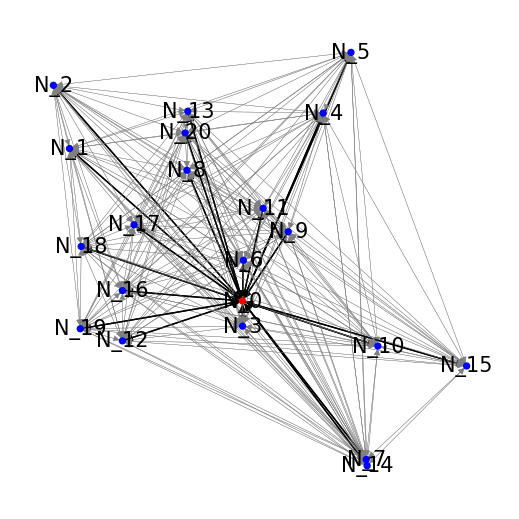

In [3]:
# np.random.seed(0)
horizonte = 60
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'n20full.xlsx' ,plot=True)
historia = simular_demanda_previa(G, dist = 'n', T=360, d=30, ruido=0)

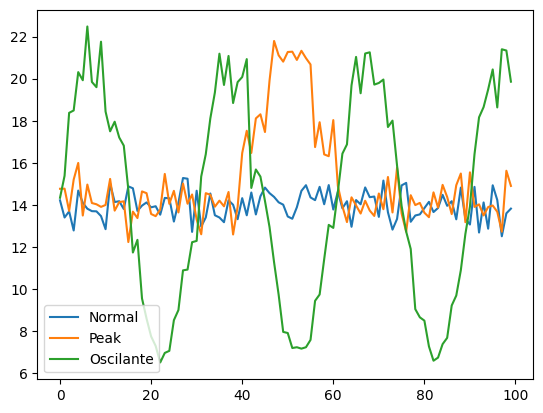

In [4]:
demanda_n = simular_demanda_previa(G, dist="n", T=100, ruido=0)
demanda_c = simular_demanda_previa(G, dist="c", T=100, ruido=0)
demanda_o = simular_demanda_previa(G, dist="o", T=100, ruido=0, d=30)

plt.plot(list(demanda_n['N_1']), label='Normal')
plt.plot(list(demanda_c['N_1']), label='Peak')
plt.plot(list(demanda_o['N_1']), label='Oscilante')
plt.legend()

In [5]:
#rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte, T = 360)
rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                          tipo_demanda = 'o', T = 100, d=30)

Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_18', 'N_8', 'N_11', 'N_9', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 998.9637136227336
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_9', 'N_4', 'N_5', 'N_8', 'N_20', 'N_2', 'N_18', 'N_16', 'N_12', 'N_3', 'N_10', 'N_7', 'N_0'] | costo_SO: 150.71626286144522 | costo_r: 1717.8259076520897
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_13', 'N_1', 'N_17', 'N_19', 'N_14', 'N_7', 'N_15', 'N_0'] | costo_SO: 0 | costo_r: 1453.0577393813276
Tiempo: 4 | Ruta: ['N_0', 'N_3', 'N_16', 'N_18', 'N_2', 'N_8', 'N_9', 'N_10', 'N_0'] | costo_SO: 73.12193187347543 | costo_r: 1063.4765954668424
Tiempo: 5 | Ruta: ['N_0', 'N_6', 'N_11', 'N_15', 'N_7', 'N_12', 'N_19', 'N_17', 

In [6]:
#rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 360, F = 15, cap = 871)
rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS_modificada(
    grafo_inicial = G, dem_historico = historia, T = 100, F = 7, cap = 871, tipo_demanda = 'o', d=30)

Calibrando...
alpha = 0.1, beta = 0.1, theta = 0.5, error = 3.704886193744266%
alpha = 0.1, beta = 0.2, theta = 0.5, error = 3.6972663313255425%
Nodo N_1: [0.1, 0.2, 0.5, 3.6972663313255425]
alpha = 0.1, beta = 0.1, theta = 0.5, error = 4.453793000995854%
alpha = 0.1, beta = 0.2, theta = 0.5, error = 4.41999391077495%
alpha = 0.1, beta = 0.3, theta = 0.5, error = 4.400820635196633%
Nodo N_2: [0.1, 0.3, 0.5, 4.400820635196633]
alpha = 0.1, beta = 0.1, theta = 0.5, error = 3.933242006002029%
alpha = 0.1, beta = 0.3, theta = 0.5, error = 3.9293709075804144%
alpha = 0.1, beta = 0.4, theta = 0.5, error = 3.9252727979507744%
alpha = 0.1, beta = 0.5, theta = 0.5, error = 3.922766798537604%
alpha = 0.1, beta = 0.6, theta = 0.5, error = 3.9214887767418753%
alpha = 0.1, beta = 0.7, theta = 0.5, error = 3.9209829066176503%
alpha = 0.1, beta = 0.8, theta = 0.5, error = 3.9209384467655113%
Nodo N_3: [0.1, 0.8, 0.5, 3.9209384467655113]
alpha = 0.1, beta = 0.1, theta = 0.5, error = 4.987122135697879%

In [ ]:
insatisf_R = []
insatisf_P = []
print(len(costos_R[0]))
for dia in range(len(dems_P)):
    insatisf_R.append(costos_R[0][dia]/sum(dems_P[dia].values()))
    insatisf_P.append(costos_P[0][dia]/sum(dems_P[dia].values()))

len(insatisf_P)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#The data

#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(len(insatisf_R))]
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, insatisf_R, width, color = 'r', label = 'Instatisfacción Reactiva', align='edge')
ax.bar(range(len(insatisf_P)), insatisf_P,width, color = 'b', label = 'Instatisfacción Proactiva', align='edge')

ax.set_xlabel('Test histogram')
ax.set_ylabel('Y axis')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
plt.plot(smooth(inventarios_R, 10), color = 'red', label = 'Inventario Reactiva')
plt.plot(smooth(inventarios_P, 10), color = 'blue', label = 'Inventario Proactiva')

plt.xlabel('Tiempo')
plt.ylabel('Inventario')
plt.title('Inventario total en el tiempo')
plt.legend(['Inventario Pol. proactiva', 'Inventario Pol. reactiva'])
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0000,2000)

In [ ]:
# for i in range(60):
#     print(costos_R[0][i], costos_R[1][i])

costo_total_P = [costos_P[0][i] + costos_P[1][i] for i in range(len(costos_P[0]))]
costo_total_R = [costos_R[0][i] + costos_R[1][i] for i in range(len(costos_R[0]))]

In [ ]:
plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

In [ ]:
# plt.plot(smooth(inventarios_P, 7), color = 'red')
# plt.plot(smooth(inventarios_R, 7), color = 'blue')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,3000)

In [ ]:
costo_total_P_inv = [costos_P[0][i]*3 + costos_P[1][i] + inventarios_P[i]*2 for i in range(len(costos_P[0]))]
costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

In [ ]:
plt.plot(smooth(inventarios_R, 7), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(inventarios_P, 7), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,3500)

In [ ]:
plt.plot(smooth(costo_total_R, 7), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(costo_total_P, 7), color = 'blue', label = 'Proactiva Total')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,2000)

In [ ]:

plt.figure(figsize=(10,6))

plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costo_total_P_inv, 10), color = 'blue', label = 'Proactiva Total')
plt.plot(smooth(inventarios_P, 10), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')
plt.plot(smooth(costos_P[0], 10), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 10), color = 'blue', linestyle = '--', label = 'Proactiva R')


plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
# plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,6000)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
l2 = plt.legend(bbox_to_anchor=(1.01, 0), loc="lower left", borderaxespad=0)
plt.show()

In [ ]:
# plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
# plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
# plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
# plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

costo_rutas_R = np.sum(costos_R[1])/1000000
costo_SO_R = np.sum(costos_R[0])*3/1000000
costo_inv_R = np.sum(inventarios_R)*2/1000000
CR = [costo_rutas_R, costo_SO_R, costo_inv_R]

costo_rutas_P = np.sum(costos_P[1])/1000000
costo_SO_P = np.sum(costos_P[0])*3/1000000
costo_inv_P = np.sum(inventarios_P)*2/1000000
CP = [costo_rutas_P, costo_SO_P, costo_inv_P]
#The data
print(CR, CP)
#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(3)]
fig = plt.figure()
ax = fig.add_subplot(111)

# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, CR, width, color = 'r', label = 'Estrategia Reactiva', align='edge')
ax.bar(range(3), CP, width, color = 'b', label = 'Estrategia Proactiva', align='edge')
plt.xticks([0, 1, 2],['Rutas', 'Stockouts', 'Inventario'])
plt.xlabel('Categoría')
plt.ylabel('Costos (MM\$)')
plt.legend()
plt.ylim(0,2)
plt.show()

In [ ]:
# costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_P[0])*3, np.sum(costos_P[1]), np.sum(inventarios_P)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('Set3')
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Proactiva')
plt.show()

In [ ]:
CR_R = []
for cr in costos_R[1]:
    if cr == np.inf:
        CR_R.append(0)
    else:
        CR_R.append(cr)

In [ ]:
labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_R[0])*3, np.sum(CR_R), np.sum(inventarios_R)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('hls')[3:]
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Reactiva')
plt.show()

In [ ]:
#cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
#cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

#print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
#print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [ ]:
#datos = dispersion_intervalos(df)
        
#df_nodos['mean'] = datos['mean']
#df_nodos['std'] = datos['std']
#df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
#df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
#df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
#df_nodos

In [ ]:
#df_nodos_corr.corr()

In [ ]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}_osc.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'o', T=1000, d=30)
        #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                           tipo_demanda = 'o', T = 360, d=30)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')

In [ ]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')



        

In [ ]:
datos_P = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_PRO_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 365, F = 5, cap = cap_tpte)
        datos_P[f'n{n}{i}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P}
        N = len(G.nodes())-1
        df = generar_df(rutas_P, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')


In [ ]:
inventarios_P = {k: datos_P[k]['inventarios'] for k in list(datos_P.keys())}
inventarios_R = {k: datos_R[k]['inventarios'] for k in list(datos_R.keys())}

In [ ]:


# generamos un dataframe para luego plotear
perdidas_P_1 = np.array(perdidas_P['n20estandar'])
dias = np.arange(1,366)
perdidas_R_1 = np.array(perdidas_R['n20estandar'])
# ahora graficamos
plt.figure(figsize=(15,5))
plt.plot(dias, perdidas_P_1, label = 'Politica P')

plt.plot(dias, perdidas_R_1, label = 'Politica R')

plt.legend()

plt.show()


## Simulación Completa

In [ ]:
n_s = [10,20,30]
inicial = ['empty', 'estandar', 'full']
demandas = ['n', 'c', 'o']#,'d']
datos_R_sim = {}
df_costos = pd.DataFrame()
for n in n_s:
    for i in inicial:
        for dem in demandas:
            file_name = f'n{n}{i}.xlsx'
            output_tablero = f'plots//tablero_R_n{n}_{i}_{dem}.png'
            G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
            historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)
            #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
            rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                            tipo_demanda = dem, T = 365, d=30)
            datos_R_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R,
                                            'costos': costos_R, 'demanda': dems_R}
            costos_consolidados = calcular_costo_consolidado(costos_R, inventarios_R)
            df_costos = pd.concat([df_costos, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
            N = len(G.nodes())-1

            df_rutas = generar_df(rutas_R, N)
            plotear_tablero_visitas(df_rutas, guardar = True, nombre = output_tablero)
            print (f'Listo {file_name} con demanda {dem}')

df_costos.to_csv('costos_R.csv')

json.dump(datos_R_sim, open('datos_R_sim.json', 'w'))

### Simulación P

In [ ]:
#n_s = [10,20,30]
#inicial = ['empty', 'estandar', 'full']
#demandas = ['n', 'c', 'o']
datos_P_sim = {}
df_costos_P = pd.DataFrame()
for n in n_s:
    for i in inicial:
        for dem in demandas:
            file_name = f'n{n}{i}.xlsx'
            output = f'plots//tablero_P_n{n}_{i}_{dem}.png'
            G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
            historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)
            #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
            rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS_modificada(grafo_inicial = G, dem_historico = historia, cap = cap_tpte,
                                                                            tipo_demanda = dem, T = 365, d=30)
            datos_P_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P,
                                            'costos': costos_P, 'demanda': dems_P}
            
            costos_consolidados = calcular_costo_consolidado(costos_P, inventarios_P)
            df_costos_P = pd.concat([df_costos_P, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
            N = len(G.nodes())-1
            df = generar_df(rutas_P, N)
            plotear_tablero_visitas(df, guardar = True, nombre = output)
            print (f'Listo {file_name} con demanda {dem}')

df_costos_P.to_csv('costos_P.csv')
json.dump(datos_P_sim, open('datos_P_sim.json', 'w'))

### Simulación Gurobi

Status inicial grafo
[('N_0', {'Inv': 1428, 'Up': 100000, 'Low': 0, 'Prod': -581, 'h': 0.3, 'coord_x': 444, 'coord_y': 237, 'pos': (444, 237)}), ('N_1', {'Inv': 87, 'Up': 174, 'Low': 0, 'Prod': 87, 'h': 0.23, 'coord_x': 152, 'coord_y': 180, 'pos': (152, 180)}), ('N_2', {'Inv': 27, 'Up': 54, 'Low': 0, 'Prod': 27, 'h': 0.32, 'coord_x': 230, 'coord_y': 141, 'pos': (230, 141)}), ('N_3', {'Inv': 20, 'Up': 30, 'Low': 0, 'Prod': 10, 'h': 0.33, 'coord_x': 134, 'coord_y': 163, 'pos': (134, 163)}), ('N_4', {'Inv': 55, 'Up': 110, 'Low': 0, 'Prod': 55, 'h': 0.23, 'coord_x': 459, 'coord_y': 282, 'pos': (459, 282)}), ('N_5', {'Inv': 142, 'Up': 213, 'Low': 0, 'Prod': 71, 'h': 0.18, 'coord_x': 269, 'coord_y': 455, 'pos': (269, 455)}), ('N_6', {'Inv': 69, 'Up': 138, 'Low': 0, 'Prod': 69, 'h': 0.29, 'coord_x': 79, 'coord_y': 326, 'pos': (79, 326)}), ('N_7', {'Inv': 158, 'Up': 237, 'Low': 0, 'Prod': 79, 'h': 0.42, 'coord_x': 5, 'coord_y': 235, 'pos': (5, 235)}), ('N_8', {'Inv': 86, 'Up': 129, 'Low': 0, '

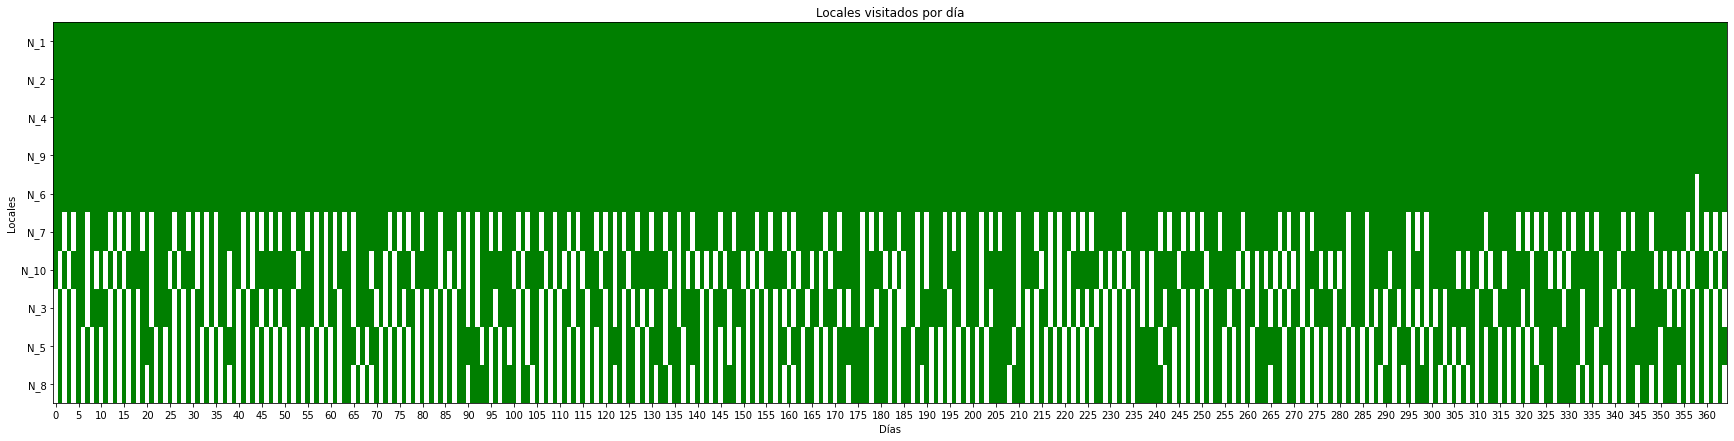

Listo n10estandar.xlsx con demanda n
Status inicial grafo
[('N_0', {'Inv': 1428, 'Up': 100000, 'Low': 0, 'Prod': -581, 'h': 0.3, 'coord_x': 444, 'coord_y': 237, 'pos': (444, 237)}), ('N_1', {'Inv': 87, 'Up': 174, 'Low': 0, 'Prod': 87, 'h': 0.23, 'coord_x': 152, 'coord_y': 180, 'pos': (152, 180)}), ('N_2', {'Inv': 27, 'Up': 54, 'Low': 0, 'Prod': 27, 'h': 0.32, 'coord_x': 230, 'coord_y': 141, 'pos': (230, 141)}), ('N_3', {'Inv': 20, 'Up': 30, 'Low': 0, 'Prod': 10, 'h': 0.33, 'coord_x': 134, 'coord_y': 163, 'pos': (134, 163)}), ('N_4', {'Inv': 55, 'Up': 110, 'Low': 0, 'Prod': 55, 'h': 0.23, 'coord_x': 459, 'coord_y': 282, 'pos': (459, 282)}), ('N_5', {'Inv': 142, 'Up': 213, 'Low': 0, 'Prod': 71, 'h': 0.18, 'coord_x': 269, 'coord_y': 455, 'pos': (269, 455)}), ('N_6', {'Inv': 69, 'Up': 138, 'Low': 0, 'Prod': 69, 'h': 0.29, 'coord_x': 79, 'coord_y': 326, 'pos': (79, 326)}), ('N_7', {'Inv': 158, 'Up': 237, 'Low': 0, 'Prod': 79, 'h': 0.42, 'coord_x': 5, 'coord_y': 235, 'pos': (5, 235)}), ('N_8

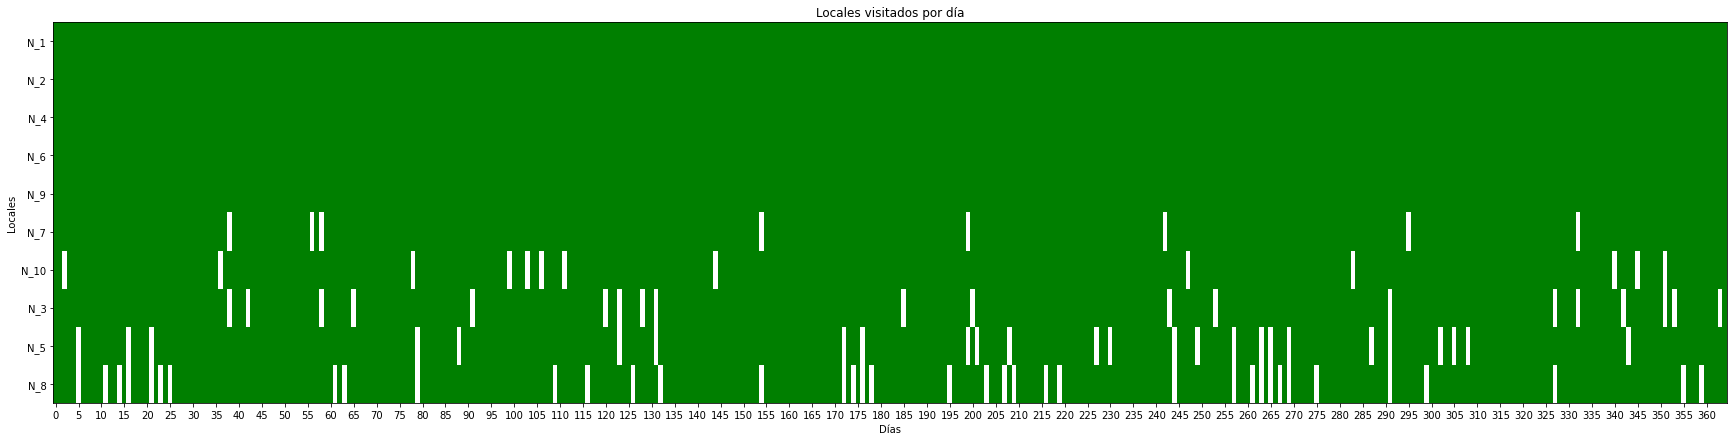

Listo n10estandar.xlsx con demanda c
Status inicial grafo
[('N_0', {'Inv': 1428, 'Up': 100000, 'Low': 0, 'Prod': -581, 'h': 0.3, 'coord_x': 444, 'coord_y': 237, 'pos': (444, 237)}), ('N_1', {'Inv': 87, 'Up': 174, 'Low': 0, 'Prod': 87, 'h': 0.23, 'coord_x': 152, 'coord_y': 180, 'pos': (152, 180)}), ('N_2', {'Inv': 27, 'Up': 54, 'Low': 0, 'Prod': 27, 'h': 0.32, 'coord_x': 230, 'coord_y': 141, 'pos': (230, 141)}), ('N_3', {'Inv': 20, 'Up': 30, 'Low': 0, 'Prod': 10, 'h': 0.33, 'coord_x': 134, 'coord_y': 163, 'pos': (134, 163)}), ('N_4', {'Inv': 55, 'Up': 110, 'Low': 0, 'Prod': 55, 'h': 0.23, 'coord_x': 459, 'coord_y': 282, 'pos': (459, 282)}), ('N_5', {'Inv': 142, 'Up': 213, 'Low': 0, 'Prod': 71, 'h': 0.18, 'coord_x': 269, 'coord_y': 455, 'pos': (269, 455)}), ('N_6', {'Inv': 69, 'Up': 138, 'Low': 0, 'Prod': 69, 'h': 0.29, 'coord_x': 79, 'coord_y': 326, 'pos': (79, 326)}), ('N_7', {'Inv': 158, 'Up': 237, 'Low': 0, 'Prod': 79, 'h': 0.42, 'coord_x': 5, 'coord_y': 235, 'pos': (5, 235)}), ('N_8

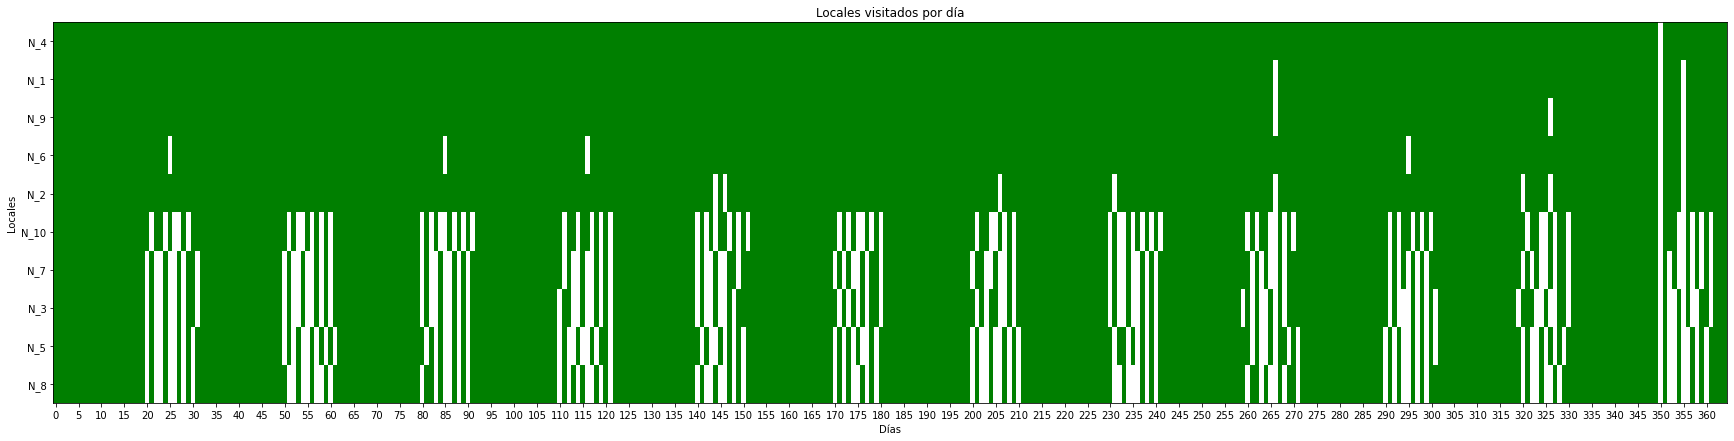

Listo n10estandar.xlsx con demanda o


In [3]:
datos_gurobi_sim = {}
df_costos_gurobi = pd.DataFrame()

n_g = [10]
inicial = ['estandar']
demandas = ['n', 'c', 'o']
for n in n_g:
    for i in inicial:
        for dem in demandas:
            file_name = f'n{n}{i}.xlsx'
            output = f'plots//tablero_gurobi_n{n}_{i}_{dem}.png'
            G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
            historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)

            rutas_gurobi, perdidas_gurobi, inventarios_gurobi, costos_gurobi, dems_gurobi = simular_ejecucion_P_deterministico(grafo_inicial = G, dem_historico = historia, cap = cap_tpte,
                                                                            tipo_demanda = dem, T = 365, d=30, F=7)

            datos_gurobi_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_gurobi, 'perdidas': perdidas_gurobi, 'inventarios': inventarios_gurobi,
                                            'costos': costos_gurobi, 'demanda': dems_gurobi}

            costos_consolidados = calcular_costo_consolidado(costos_gurobi, inventarios_gurobi)
            df_costos_gurobi = pd.concat([df_costos_gurobi, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
            N = len(G.nodes())-1
            df = generar_df(rutas_gurobi, N)
            plotear_tablero_visitas(df, guardar = True, nombre = output)
            print (f'Listo {file_name} con demanda {dem}')

df_costos_gurobi.to_csv('costos_gurobi.csv')
json.dump(datos_gurobi_sim, open('datos_gurobi_sim.json', 'w'))

In [ ]:
df_costos_R = df_costos
df_costos_R['demanda'] = [x.split('_')[-1] for x in df_costos_R.index]
df_costos_R['inicial'] = [x.split('_')[1] for x in df_costos_R.index]
df_costos_R['n'] = [x.split('_')[0][1:] for x in df_costos_R.index]

df_costos_P['demanda'] = [x.split('_')[-1] for x in df_costos_P.index]
df_costos_P['inicial'] = [x.split('_')[1] for x in df_costos_P.index]
df_costos_P['n'] = [x.split('_')[0][1:] for x in df_costos_P.index]

In [ ]:
df_costos_P

In [ ]:
promedio_n10_P = df_costos_P[df_costos_P['n'] == '10'][['demanda','costo_SO','costo_rutas','costo_inventario']].groupby(['demanda']).mean()
promedio_n20_P = df_costos_P[df_costos_P['n'] == '20'][['demanda','costo_SO','costo_rutas','costo_inventario']].groupby(['demanda']).mean()
promedio_n30_P = df_costos_P[df_costos_P['n'] == '30'][['demanda','costo_SO','costo_rutas','costo_inventario']].groupby(['demanda']).mean()

promedio_n10_R = df_costos_R[df_costos_R['n'] == '10'][['demanda','costo_SO','costo_rutas','costo_inventario']].groupby(['demanda']).mean()
promedio_n20_R = df_costos_R[df_costos_R['n'] == '20'][['demanda','costo_SO','costo_rutas','costo_inventario']].groupby(['demanda']).mean()
promedio_n30_R = df_costos_R[df_costos_R['n'] == '30'][['demanda','costo_SO','costo_rutas','costo_inventario']].groupby(['demanda']).mean()


In [ ]:
promedio_n10_P['total'] = promedio_n10_P['costo_SO'] + promedio_n10_P['costo_rutas'] + promedio_n10_P['costo_inventario']
promedio_n10_P

In [ ]:
promedio_n10_R['total'] = promedio_n10_R['costo_SO'] + promedio_n10_R['costo_rutas'] + promedio_n10_R['costo_inventario']
promedio_n10_R

In [ ]:
promedio_n20_P['suma'] = promedio_n20_P['costo_SO'] + promedio_n20_P['costo_rutas'] + promedio_n20_P['costo_inventario']
promedio_n20_P

In [ ]:
promedio_n20_R['suma'] = promedio_n20_R['costo_SO'] + promedio_n20_R['costo_rutas'] + promedio_n20_R['costo_inventario']
promedio_n20_R

In [ ]:
promedio_n30_P['suma'] = promedio_n30_P['costo_SO'] + promedio_n30_P['costo_rutas'] + promedio_n30_P['costo_inventario']
promedio_n30_P

In [ ]:
promedio_n30_R['suma'] = promedio_n30_R['costo_SO'] + promedio_n30_R['costo_rutas'] + promedio_n30_R['costo_inventario']
promedio_n30_R

In [ ]:
# plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
# plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
# plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
# plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

costo_rutas_R = np.mean(promedio_n10_R['costo_rutas'])
costo_SO_R = np.mean(promedio_n10_R['costo_SO'])
costo_inv_R = np.mean(promedio_n10_R['costo_inventario'])
CR = [costo_rutas_R, costo_SO_R, costo_inv_R]

costo_rutas_P = np.mean(promedio_n10_P['costo_rutas'])
costo_SO_P = np.mean(promedio_n10_P['costo_SO'])
costo_inv_P = np.mean(promedio_n10_P['costo_inventario'])

CP = [costo_rutas_P, costo_SO_P, costo_inv_P]
#The data
print(CR, CP)
#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(3)]
fig = plt.figure()
ax = fig.add_subplot(111)

# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, CR, width, color = 'r', label = 'Estrategia Reactiva', align='edge')
ax.bar(range(3), CP, width, color = 'b', label = 'Estrategia Proactiva', align='edge')
plt.xticks([0, 1, 2],['Rutas', 'Stockouts', 'Inventario'])
plt.xlabel('Categoría')
plt.ylabel('Costos (MM\$)')
plt.legend()
plt.ylim(0,0.1)
plt.show()

## Testeo Solución Gurobi

Status inicial grafo
[('N_0', {'Inv': 1428, 'Up': 100000, 'Low': 0, 'Prod': -581, 'h': 0.3, 'coord_x': 444, 'coord_y': 237, 'pos': (444, 237)}), ('N_1', {'Inv': 87, 'Up': 174, 'Low': 0, 'Prod': 87, 'h': 0.23, 'coord_x': 152, 'coord_y': 180, 'pos': (152, 180)}), ('N_2', {'Inv': 27, 'Up': 54, 'Low': 0, 'Prod': 27, 'h': 0.32, 'coord_x': 230, 'coord_y': 141, 'pos': (230, 141)}), ('N_3', {'Inv': 20, 'Up': 30, 'Low': 0, 'Prod': 10, 'h': 0.33, 'coord_x': 134, 'coord_y': 163, 'pos': (134, 163)}), ('N_4', {'Inv': 55, 'Up': 110, 'Low': 0, 'Prod': 55, 'h': 0.23, 'coord_x': 459, 'coord_y': 282, 'pos': (459, 282)}), ('N_5', {'Inv': 142, 'Up': 213, 'Low': 0, 'Prod': 71, 'h': 0.18, 'coord_x': 269, 'coord_y': 455, 'pos': (269, 455)}), ('N_6', {'Inv': 69, 'Up': 138, 'Low': 0, 'Prod': 69, 'h': 0.29, 'coord_x': 79, 'coord_y': 326, 'pos': (79, 326)}), ('N_7', {'Inv': 158, 'Up': 237, 'Low': 0, 'Prod': 79, 'h': 0.42, 'coord_x': 5, 'coord_y': 235, 'pos': (5, 235)}), ('N_8', {'Inv': 86, 'Up': 129, 'Low': 0, '

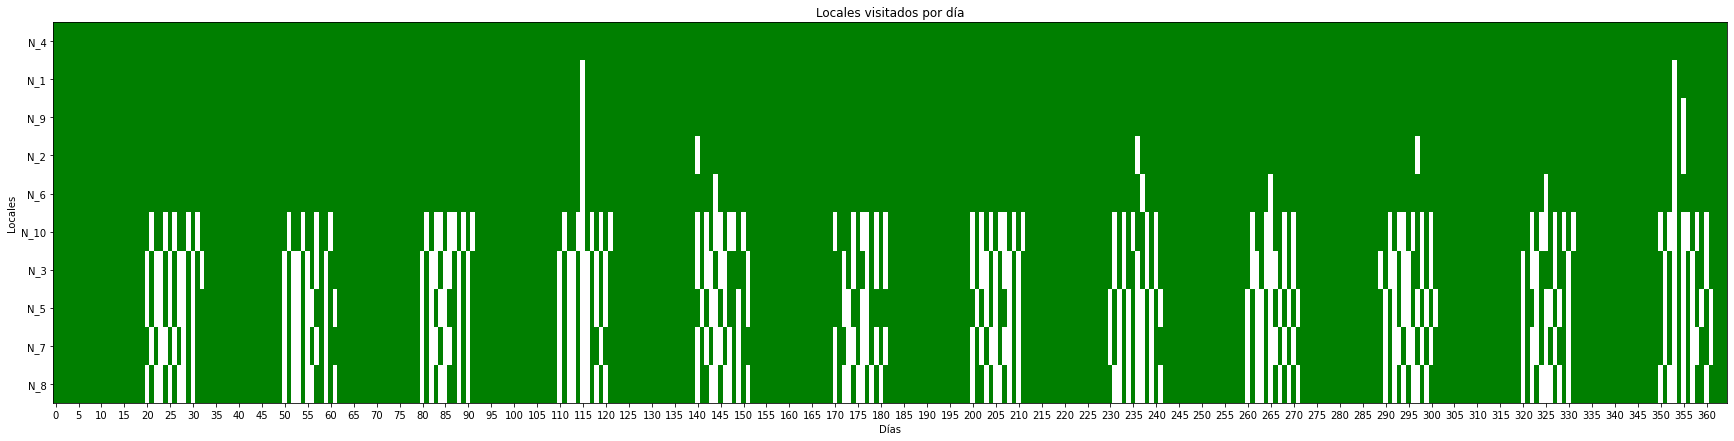

Listo n10estandar.xlsx con demanda o


In [3]:
# random.seed(0)
datos_gurobi_sim = {}
df_costos_gurobi = pd.DataFrame()
n = 10
i = 'estandar'
dem = 'o'
file_name = f'n{n}{i}.xlsx'
output = f'plots//tablero_gurobi_n{n}_{i}_{dem}.png'
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)

rutas_gurobi, perdidas_gurobi, inventarios_gurobi, costos_gurobi, dems_gurobi = simular_ejecucion_P_deterministico(grafo_inicial = G, dem_historico = historia, cap = cap_tpte,
                                                                tipo_demanda = dem, T = 365, d=30, F=5)
#solucion = simular_ejecucion_P_deterministico(grafo_inicial = G, dem_historico = historia, cap = cap_tpte,
#                                                                tipo_demanda = dem, T = 365, d=30,
#                                                               TEST = True)
datos_gurobi_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_gurobi, 'perdidas': perdidas_gurobi, 'inventarios': inventarios_gurobi,
                                'costos': costos_gurobi, 'demanda': dems_gurobi}

costos_consolidados = calcular_costo_consolidado(costos_gurobi, inventarios_gurobi)
df_costos_gurobi = pd.concat([df_costos_gurobi, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
N = len(G.nodes())-1
df = generar_df(rutas_gurobi, N)
plotear_tablero_visitas(df, guardar = True, nombre = output)
print (f'Listo {file_name} con demanda {dem}')

df_costos_gurobi.to_csv('costos_gurobi.csv')
json.dump(datos_gurobi_sim, open('datos_gurobi_sim.json', 'w'))

In [ ]:
# x decide para un arco, un vehículo y un día
# q decide la cantidad a llevar???
# y decide si se visita o no el nodo
solucion # x q y m, y_pred